# GROUP 2 - dataset 2

# Import the program

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [2]:
# Change working directory to dataset folder
os.chdir("F:/STUDY HCA IN TAIWAN/3. Grade 3/Basic computer programming/final project/dataset") 
os.getcwd()
os.listdir()

['diabetic_data.csv',
 'huy_data.csv',
 'IDs_mapping.csv',
 'linh_data.csv',
 'Preprocesingda_imputed.csv',
 'preprocessed_data.csv',
 'vy_data.csv']

In [3]:
df = pd.read_csv('diabetic_data.csv')
df.tail()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101765,443867222,175429310,Caucasian,Male,[70-80),?,1,1,7,6,...,No,No,No,No,No,No,No,No,No,NO


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [5]:
# Find the variables with missing values

miss_var = [] # list of missing variables
null =[] # % missing of each var in data

def null_counter(factor):
    val= len(df[df[factor]=='?'])/101765 *100
    return val

for i in range(len(df.columns.values)):
    null.append(null_counter(df.columns.values[i]))
for i in range(len(null)):
    if null[i] >0:
        miss_var.append(df.columns.values[i]) # If val >0, var in include in miss_var
null  
miss_var


['race',
 'weight',
 'payer_code',
 'medical_specialty',
 'diag_1',
 'diag_2',
 'diag_3']

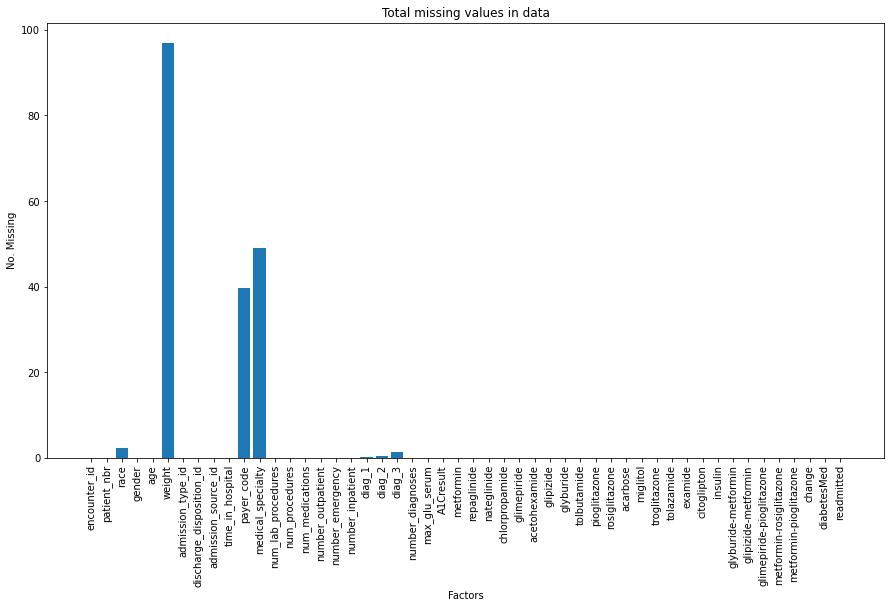

In [6]:
# plot the data with missing variables

def plot_null(df):
    null = []
    for i in range(len(df.columns.values)):
        null.append(null_counter(df.columns.values[i]))
    fig = plt.figure(figsize=(15,8))
    plt.bar(df.columns.values,null,)
    plt.xticks(rotation=90)
    plt.title('Total missing values in data')
    plt.xlabel('Factors')
    plt.ylabel('No. Missing')
    plt.show()
    

plot_null(df)

In [7]:
# Define the missing variables
miss_var

['race',
 'weight',
 'payer_code',
 'medical_specialty',
 'diag_1',
 'diag_2',
 'diag_3']

In [8]:
# Drop the missing variables
df = df.drop(['weight', 'payer_code', 'medical_specialty', 'encounter_id', 'diag_1', 'diag_2' , 'diag_3'], axis = 1)

In [9]:
# Drop gender with Unknown/ invalid
df = df.drop(df.loc[df['gender']=="Unknown/Invalid"].index, axis =0)

# Impute the race variables

In [10]:
df=df.replace('?',np.nan) 

In [11]:
df['race'].isnull().sum()

2271

In [12]:
df['race'].value_counts()
df['race']=df['race'].fillna('Caucasian')

In [13]:
df['race'].isnull().sum()

0

In [14]:
def missing(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return tt    

missing(df)['Percent'].sort_values(ascending=False)

readmitted                  0.0
num_medications             0.0
repaglinide                 0.0
metformin                   0.0
A1Cresult                   0.0
max_glu_serum               0.0
number_diagnoses            0.0
number_inpatient            0.0
number_emergency            0.0
number_outpatient           0.0
num_procedures              0.0
chlorpropamide              0.0
num_lab_procedures          0.0
time_in_hospital            0.0
admission_source_id         0.0
discharge_disposition_id    0.0
admission_type_id           0.0
age                         0.0
gender                      0.0
race                        0.0
nateglinide                 0.0
glimepiride                 0.0
diabetesMed                 0.0
examide                     0.0
change                      0.0
metformin-pioglitazone      0.0
metformin-rosiglitazone     0.0
glimepiride-pioglitazone    0.0
glipizide-metformin         0.0
glyburide-metformin         0.0
insulin                     0.0
citoglip

In [15]:
df['race'].value_counts()

Caucasian          78370
AfricanAmerican    19210
Hispanic            2037
Other               1505
Asian                641
Name: race, dtype: int64

In [16]:
pd.DataFrame(df).to_csv("full_data_imputed.csv")

# DEFINE THE CATEGORICAL AND NUMERIC VARIABLES

In [17]:
# list of categories var
cate_var = ['age','race', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']

# list of numeric var
num_var = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient']

In [18]:
# loop to change each column to category type
for col in cate_var:
    df[col] = df[col].astype('category',copy=False)

print("\nExample data changed to category type")
print(df)
print(df.dtypes)


Example data changed to category type
        patient_nbr             race  gender      age admission_type_id  \
0           8222157        Caucasian  Female   [0-10)                 6   
1          55629189        Caucasian  Female  [10-20)                 1   
2          86047875  AfricanAmerican  Female  [20-30)                 1   
3          82442376        Caucasian    Male  [30-40)                 1   
4          42519267        Caucasian    Male  [40-50)                 1   
...             ...              ...     ...      ...               ...   
101761    100162476  AfricanAmerican    Male  [70-80)                 1   
101762     74694222  AfricanAmerican  Female  [80-90)                 1   
101763     41088789        Caucasian    Male  [70-80)                 1   
101764     31693671        Caucasian  Female  [80-90)                 2   
101765    175429310        Caucasian    Male  [70-80)                 1   

       discharge_disposition_id admission_source_id  time_in

In [19]:
# loop to change each column to nummeric type - delete the missing value in advanced
for col in num_var:
    df[col] = df[col].astype('int64',copy=False)

print("\nExample data changed to numeric type")
print(df)
print(df.dtypes)


#df['num_procedures'] = df['num_procedures'].astype('float',copy=False)
#df['num_procedures'].dtypes


Example data changed to numeric type
        patient_nbr             race  gender      age admission_type_id  \
0           8222157        Caucasian  Female   [0-10)                 6   
1          55629189        Caucasian  Female  [10-20)                 1   
2          86047875  AfricanAmerican  Female  [20-30)                 1   
3          82442376        Caucasian    Male  [30-40)                 1   
4          42519267        Caucasian    Male  [40-50)                 1   
...             ...              ...     ...      ...               ...   
101761    100162476  AfricanAmerican    Male  [70-80)                 1   
101762     74694222  AfricanAmerican  Female  [80-90)                 1   
101763     41088789        Caucasian    Male  [70-80)                 1   
101764     31693671        Caucasian  Female  [80-90)                 2   
101765    175429310        Caucasian    Male  [70-80)                 1   

       discharge_disposition_id admission_source_id  time_in_

In [20]:
# Save full data 
df.to_csv('preprocessed_data.csv')

# Descriptive analysis

## Univariate analysis - Categorical var

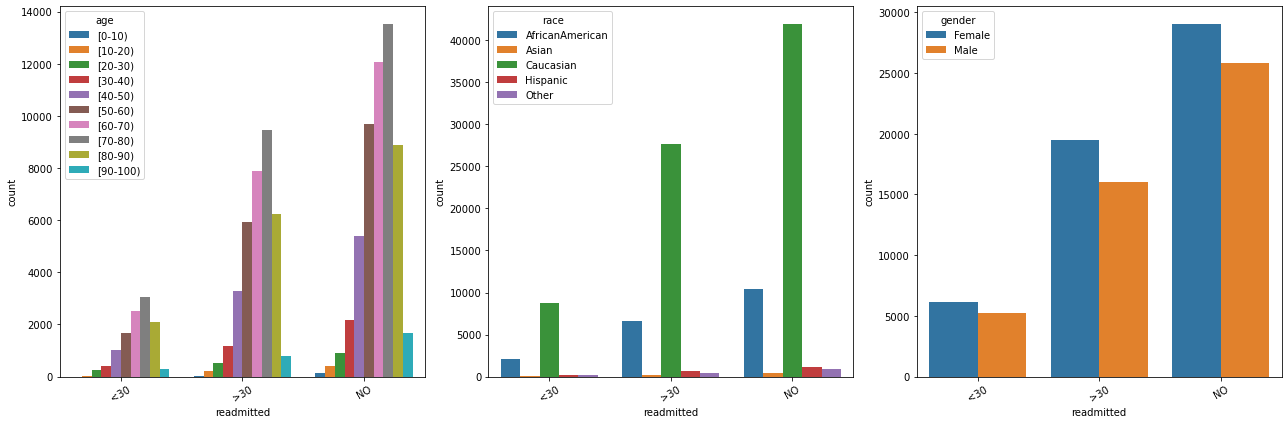

In [21]:
# Univariable background
background = ['age','race', 'gender']
fig, axes = plt.subplots(1,3, figsize = (18,6), sharex = False) # row, col
axes = axes.flatten()

for ax, backgrd in zip(axes, background):
    sns.countplot(x = 'readmitted', 
                  hue = backgrd ,
                  data = df, ax=ax)
    ax.tick_params(axis='x', rotation=30)
plt.tight_layout()
plt.show()

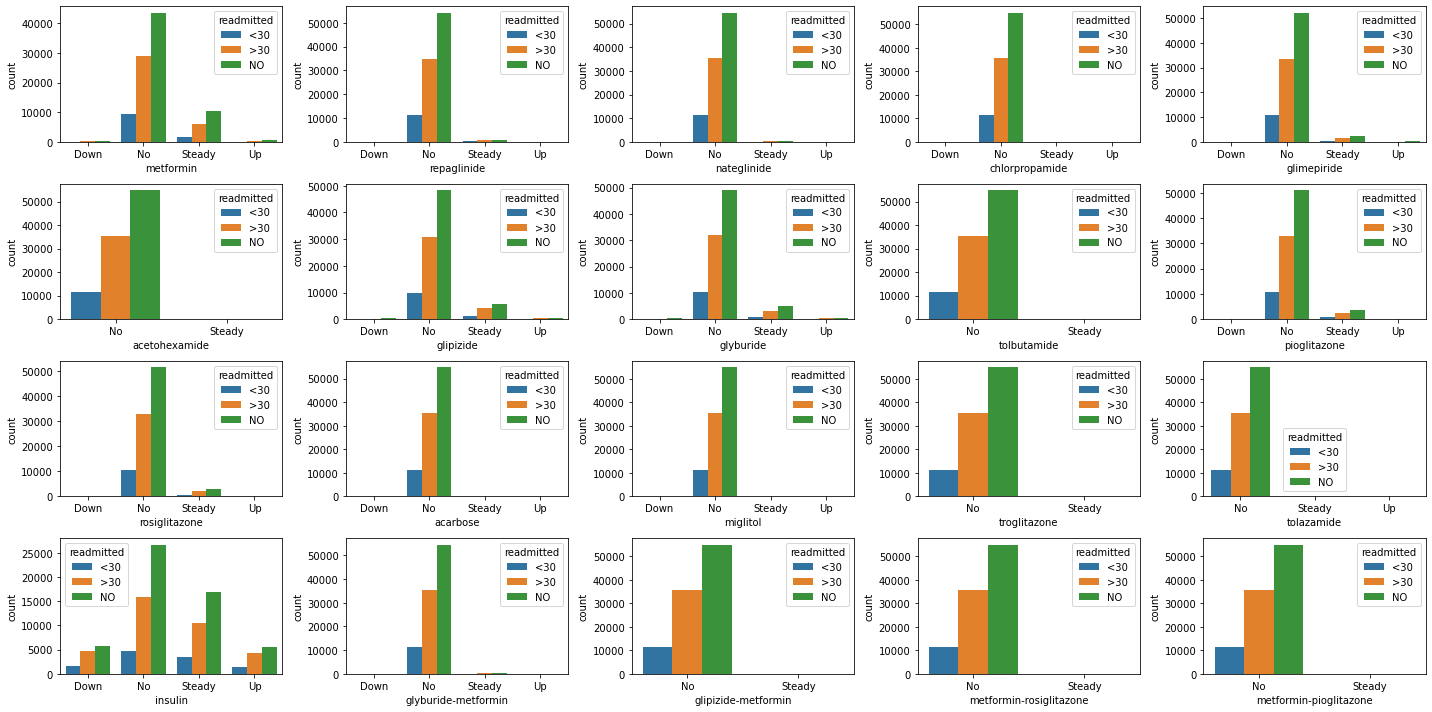

In [22]:
drug = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
             'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
             'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
             'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 
             'metformin-rosiglitazone', 'metformin-pioglitazone']
fig, axes = plt.subplots(4,5, figsize = (20,10), sharex = False)
axes = axes.flatten()

for ax, drug in zip(axes, drug):
    sns.countplot(x = drug, 
                  hue = "readmitted",
                  data = df, ax=ax)
plt.tight_layout()
plt.show()

In [23]:
cate_var

['age',
 'race',
 'gender',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'readmitted']

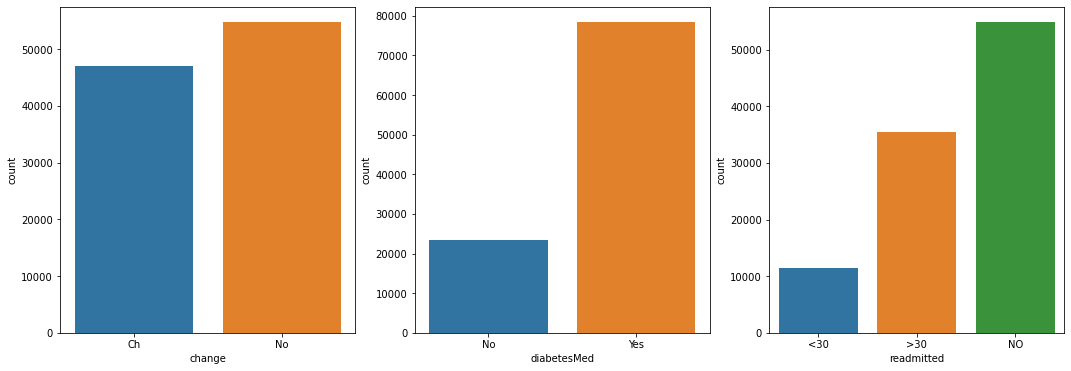

In [24]:
# Treatment condition
trt = ['change',  'diabetesMed',  'readmitted']

fig, axes = plt.subplots(1,3, figsize = (18,6), sharex = False)
axes = axes.flatten()

for ax, trt in zip(axes, trt):
    sns.countplot(x = trt, data= df, ax=ax)
plt.show()

## Univariate analysis - Numeric var

In [25]:
# Set the sub data for numerical var

In [26]:
num_var

['time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient']

In [27]:
num_df = df[['time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient']]

gen_num_df = df[[ 'gender','time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient']]

array([[<AxesSubplot:title={'center':'time_in_hospital'}>,
        <AxesSubplot:title={'center':'num_lab_procedures'}>,
        <AxesSubplot:title={'center':'num_procedures'}>],
       [<AxesSubplot:title={'center':'num_medications'}>,
        <AxesSubplot:title={'center':'number_outpatient'}>,
        <AxesSubplot:title={'center':'number_emergency'}>],
       [<AxesSubplot:title={'center':'number_inpatient'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

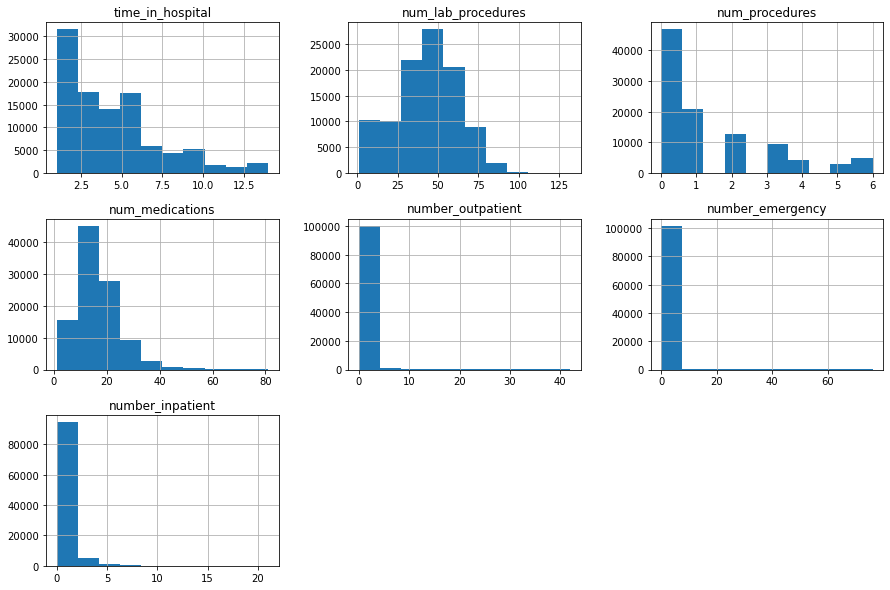

In [28]:
num_df.hist(figsize =(15,10))

In [29]:
num_var[0]

'time_in_hospital'

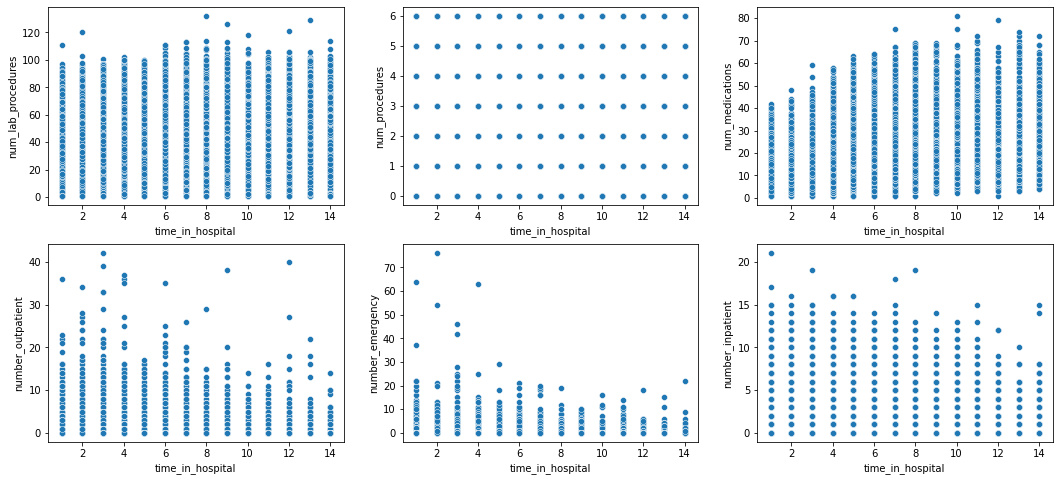

In [30]:
# scatter plot between time_in_hospital and other numeric vars
num_var1 = num_var[1:]
fig, axes = plt.subplots(2,3, figsize = (18,8), sharex = False)
axes = axes.flatten()
for ax, y_axis in zip(axes, num_var1):
    sns.scatterplot(x= 'time_in_hospital' ,y= y_axis, data= df, ax=ax)

<AxesSubplot:>

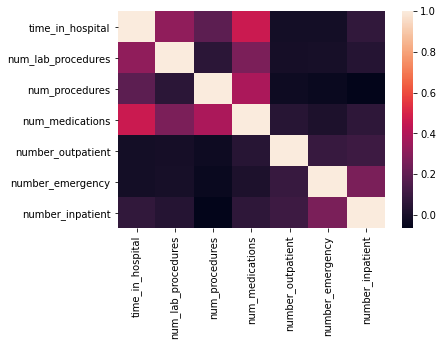

In [31]:
# check correlation matrix 

sns.heatmap(num_df.corr())

## Bivariate analysis

In [32]:
# Table 1 - numeric var by Race 
df.groupby('race')[num_var].mean()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient
race,,,,,,,
AfricanAmerican,4.507860,44.085060,1.234669,15.368922,0.239927,0.261010,0.701770
Asian,3.995320,41.212168,1.344774,13.291732,0.165367,0.093604,0.482059
Caucasian,4.382927,42.869682,1.367526,16.272107,0.406099,0.181587,0.624729
Hispanic,4.059892,42.793324,1.116838,14.030437,0.324497,0.228277,0.611193
Other,4.275748,43.462458,1.530233,15.181395,0.256478,0.241196,0.454485


In [33]:
# Table 2 - numeric var by gender 
df.groupby('gender')[num_var].mean()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient
gender,,,,,,,
Female,4.478797,43.151769,1.244900,16.187888,0.382832,0.216020,0.652683
Male,4.299777,43.030964,1.449899,15.828775,0.353714,0.176708,0.615705


In [34]:
#Table 3 - numeric var by age group
df.groupby('age')[num_var].mean()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient
age,,,,,,,
[0-10),2.546584,41.012422,0.180124,6.180124,0.012422,0.031056,0.080745
[10-20),3.191027,43.096961,0.335745,8.277858,0.170767,0.156295,0.532562
[20-30),3.564876,43.066385,0.767049,11.972842,0.366325,0.578153,1.338564
[30-40),3.799735,43.033642,1.113377,14.091656,0.290861,0.490331,0.762649
[40-50),4.039649,42.785958,1.341662,15.391017,0.329892,0.356840,0.724109
[50-60),4.125753,42.611961,1.556096,16.584492,0.328002,0.222473,0.615090
[60-70),4.382395,42.600836,1.573392,17.150921,0.388088,0.162441,0.606174
[70-80),4.590885,43.158252,1.377733,16.407427,0.393041,0.131090,0.610412
[80-90),4.808629,44.085015,1.023027,15.326685,0.417108,0.144269,0.609118


In [35]:
# race - categorical var
pd.crosstab(df.age, df.gender, margins=True)

gender,Female,Male,All
age,,,
[0-10),83,78,161
[10-20),402,289,691
[20-30),1114,543,1657
[30-40),2162,1613,3775
[40-50),4811,4874,9685
[50-60),8572,8684,17256
[60-70),11061,11421,22482
[70-80),13985,12081,26066
[80-90),10515,6682,17197


In [36]:
pd.crosstab(df.age, df.gender, normalize='index')

gender,Female,Male
age,,
[0-10),0.515528,0.484472
[10-20),0.581766,0.418234
[20-30),0.672299,0.327701
[30-40),0.572715,0.427285
[40-50),0.496748,0.503252
[50-60),0.496755,0.503245
[60-70),0.491994,0.508006
[70-80),0.536523,0.463477
[80-90),0.611444,0.388556


<AxesSubplot:xlabel='gender'>

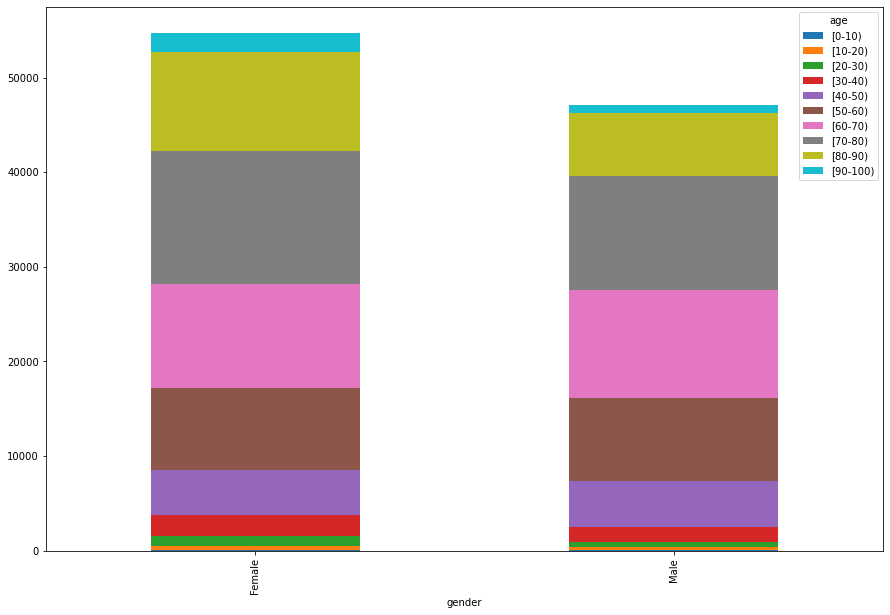

In [37]:
pd.crosstab( df.gender, df.age).plot(kind='bar', stacked=True, figsize=(15,10))

<AxesSubplot:xlabel='gender'>

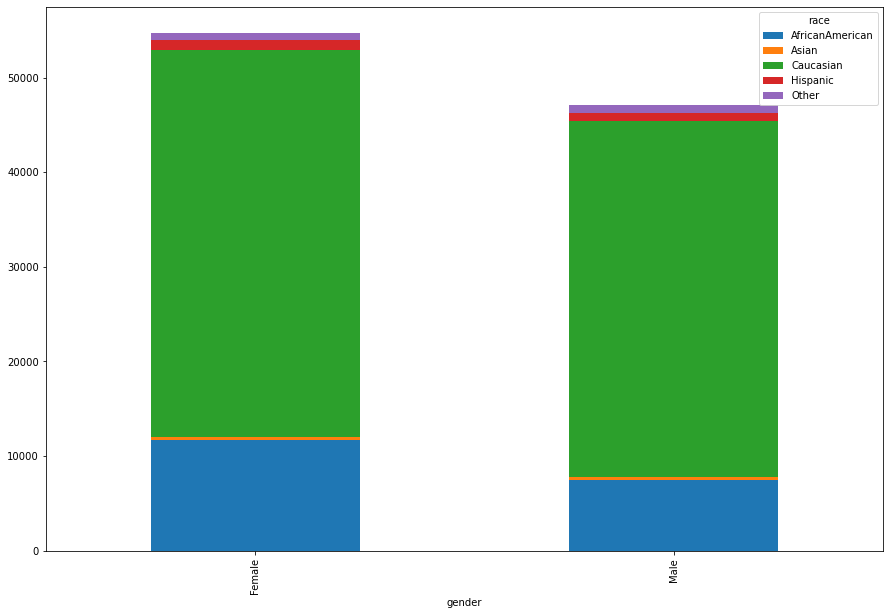

In [38]:
pd.crosstab(df.gender, df.race).plot(kind='bar', stacked=True, figsize=(15,10))

<AxesSubplot:xlabel='gender'>

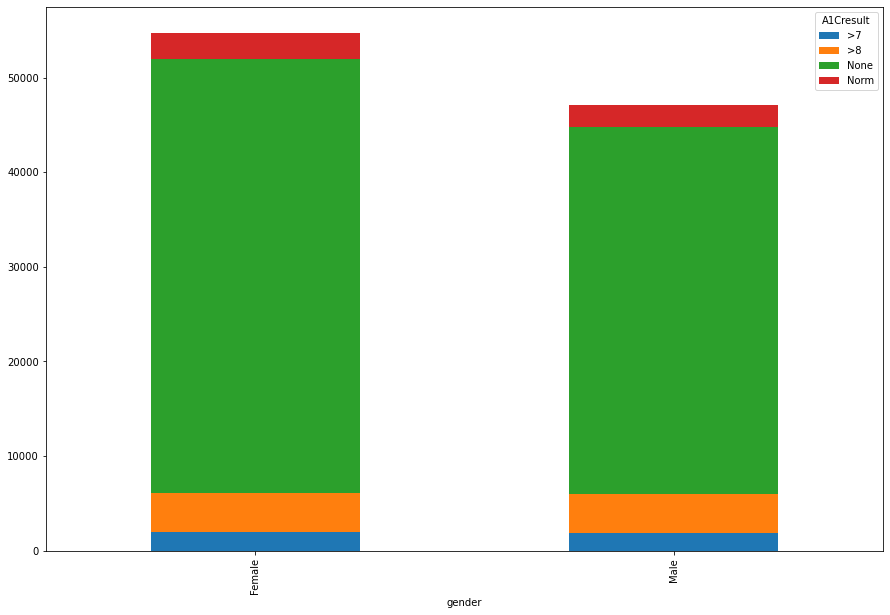

In [39]:
pd.crosstab(df.gender, df.A1Cresult).plot(kind='bar', stacked=True, figsize=(15,10))

# #Bivariate plot: numeric by categorical varibel

In [40]:
num_var

['time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient']

In [41]:
num_df = df[['gender','time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient']]

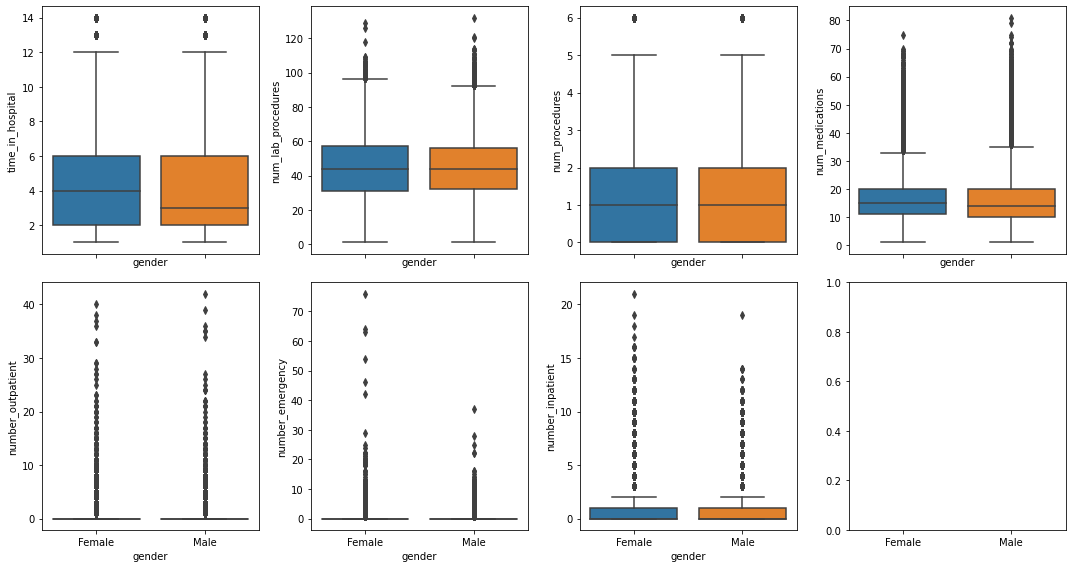

In [42]:
# Gender and numeric variable
fig, axes = plt.subplots(2,4, figsize = (15,8), sharex = True)
axes = axes.flatten()

for ax, col in zip(axes, num_var):
    sns.boxplot(x='gender', y = col, data= df, 
                  #hue = "readmitted",
                  ax=ax)
plt.tight_layout()
plt.show()

# There is no different between 2 group of plot

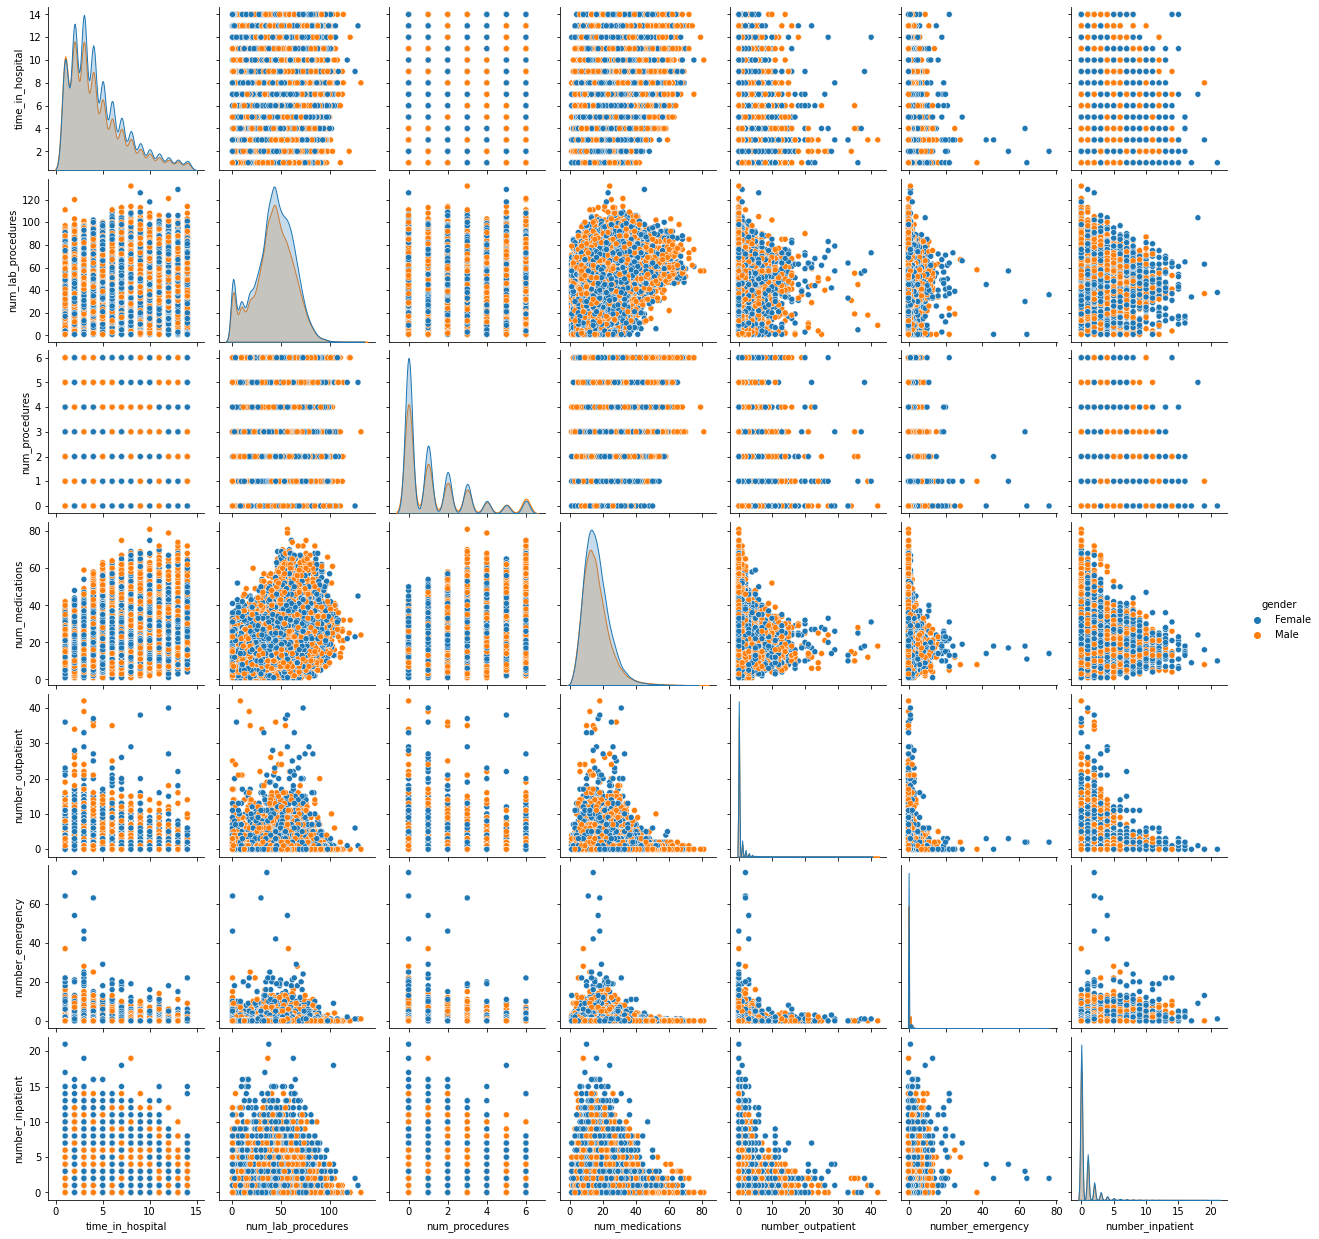

In [43]:
sns.pairplot(gen_num_df, hue='gender')

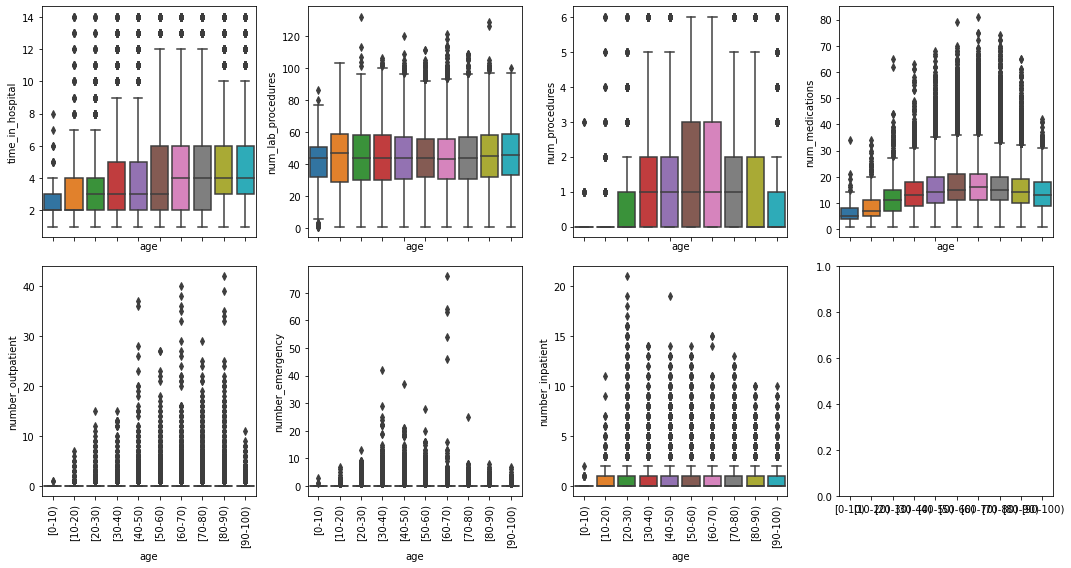

In [44]:
# Age and numeric variable
fig, axes = plt.subplots(2,4, figsize = (15,8), sharex = True)
axes = axes.flatten()

for ax, col in zip(axes, num_var):
    sns.boxplot(x='age', y = col, data= df, 
                  #hue = "readmitted",
                  ax=ax)
    ax.tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

# Time in hospital increases over the time
# Number of procedure increases in age group 50-70

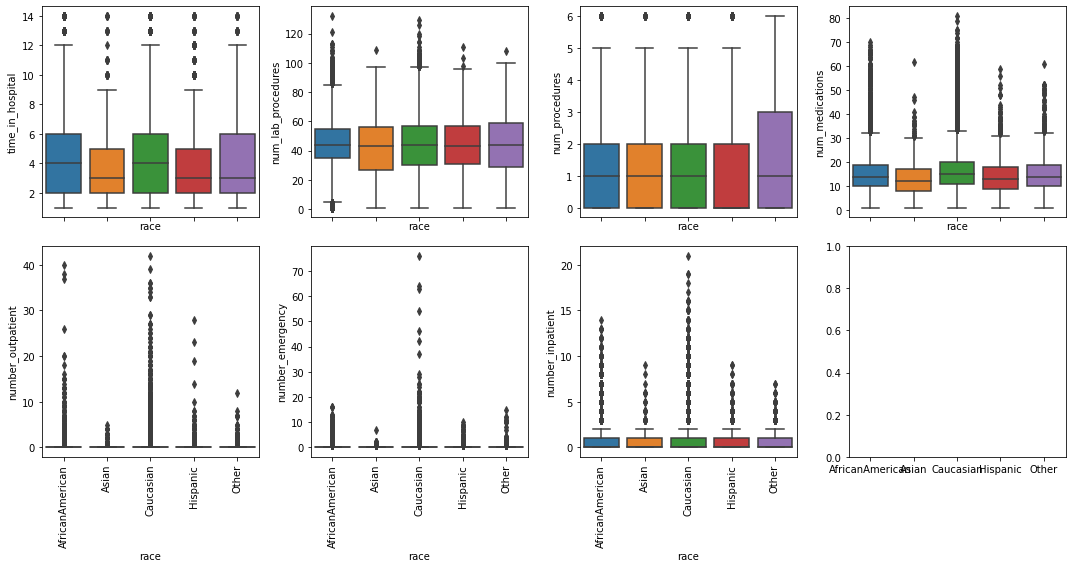

In [45]:
# Age and numeric variable
fig, axes = plt.subplots(2,4, figsize = (15,8), sharex = True)
axes = axes.flatten()

for ax, col in zip(axes, num_var):
    sns.boxplot(x='race', y = col, data= df, 
                  #hue = "readmitted",
                  ax=ax)
    ax.tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()


In [46]:
# Adding the chisq test, t test, nonparametric test in the model